In [59]:
import os
import pandas as pd
import numpy as np

In [60]:
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(os.path.abspath(''))))
csv_data_path = os.path.join(BASE_DIR, 'diplomacy_gif_maker/diplomacy_gif_maker/csv')

In [61]:
unitChangeCount_df = pd.read_csv(csv_data_path + "/unitChangeCount_full.csv")
unitsByPlayer_df = pd.read_csv(csv_data_path + "/unitsByPlayer_full.csv")
orders_df = pd.read_csv(csv_data_path + "/orders_full.csv")

In [62]:
def get_number_of_seasons(current_year: int, current_season: str):
    number_of_years = current_year - 1901
    base_number = number_of_years*3
    if current_season=="spring":
        number_of_urls = base_number + 1
    elif current_season=="fall":
        number_of_urls = base_number + 2
    else:
        number_of_urls = base_number + 3
    return number_of_urls
num_seasons = get_number_of_seasons(1921, 'fall')

In [63]:
unitsByPlayer_df['unit_type'][17]

'F'

In [64]:
unitsByPlayer_df.unit_type.replace(["{'type': 'F', 'coast': 'sc'}", "{'type': 'F', 'coast': 'nc'}"], ['F', 'F'], inplace=True)

In [65]:
unitsByPlayer_df.to_csv(csv_data_path + "/unitsByPlayer_full.csv")

In [66]:
pd.DataFrame(unitsByPlayer_df.groupby(['country']).unit_type.value_counts())

unit_type
country unit_type           
Austria A                 73
        F                  5
England F                 39
        A                  9
France  F                294
        A                168
Germany A                375
        F                150
Italy   F                157
        A                108
Russia  A                 65
        F                 25
Turkey  A                383
        F                193

In [80]:
# y(['Team', 'Pos']).agg({'Age': ['mean', 'min', 'max']})
country_year_df = pd.DataFrame(unitsByPlayer_df.groupby(['country']).year.value_counts())
country_season_df = pd.DataFrame(unitsByPlayer_df.groupby(['country', 'year']).size().unstack(fill_value=0))

In [81]:
unitsByPlayer_df

,Unnamed: 0,country,territory,unit_type,year,season,season_number
0,0,Austria,Bud,A,1901,spring,1
1,1,Austria,Tri,F,1901,spring,1
2,2,Austria,Vie,A,1901,spring,1
3,3,England,Edi,F,1901,spring,1
4,4,England,Lon,F,1901,spring,1
...,...,...,...,...,...,...,...
2039,2039,Turkey,Tun,F,1921,winter,63
2040,2040,Turkey,Tyr,A,1921,winter,63
2041,2041,Turkey,TYS,F,1921,winter,63
2042,2042,Turkey,Ukr,A,1921,winter,63


In [83]:
country_season_df

year,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,...,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921
country,,,,,,,,,,,,,,,,,,,,,
Austria,9,14,10,6,3,3,3,3,3,3,...,3,3,3,3,3,3,0,0,0,0
England,9,9,12,9,6,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
France,9,18,18,24,24,27,24,27,27,26,...,26,27,25,27,24,21,19,18,18,8
Germany,9,15,15,15,18,17,18,24,24,24,...,24,22,25,27,33,36,36,39,38,42
Italy,9,12,15,18,18,18,19,18,18,15,...,18,17,16,17,9,9,3,1,0,0
Russia,12,16,18,15,12,9,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Turkey,9,12,12,15,21,24,27,27,30,33,...,28,28,27,25,33,33,36,36,42,45


In [43]:
country_year_df.index = country_year_df.index.rename(['country', 'years'])
country_season_df.index = country_season_df.index.rename(['country', 'year','seasons'])

In [44]:
country_year_df_sorted = country_year_df.sort_values(by=['country', 'years'])
country_season_df_sorted = country_season_df.sort_values(by=['country', 'seasons'])
country_year_df_sorted = country_year_df_sorted.reset_index(level=[0,1])
country_season_df_sorted = country_season_df_sorted.reset_index(level=[0,1,2])
country_year_df_sorted.columns = ['country', 'year', 'units']
country_season_df_sorted.columns = ['country', 'year', 'season','units']

In [45]:
country_season_df_sorted

,country,year,season,units
0,Austria,1901,fall,3
1,Austria,1902,fall,5
2,Austria,1903,fall,3
3,Austria,1904,fall,2
4,Austria,1905,fall,1
...,...,...,...,...
329,Turkey,1917,winter,11
330,Turkey,1918,winter,12
331,Turkey,1919,winter,12
332,Turkey,1920,winter,14


In [46]:
country_year_df_sorted.to_csv(csv_data_path + "/temp/country_year_df.csv")
country_season_df_sorted.to_csv(csv_data_path + "/temp/country_season_units_df.csv")

In [47]:
total_years = max(unitsByPlayer_df['year'])

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [49]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

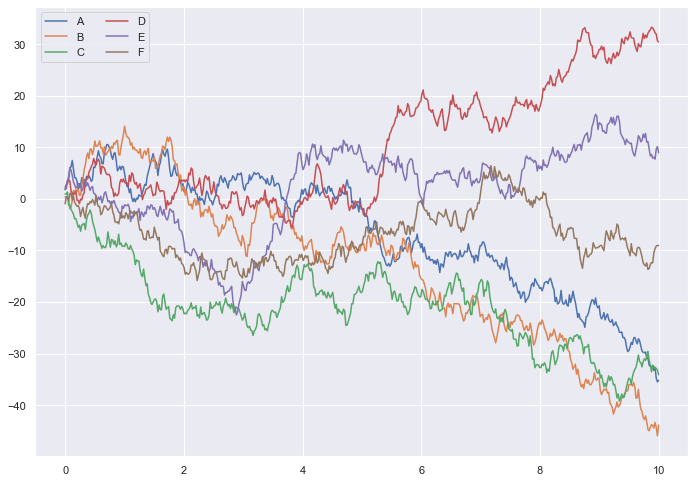

In [50]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [51]:
print(country_season_df_sorted.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  334 non-null    object
 1   year     334 non-null    int64 
 2   season   334 non-null    object
 3   units    334 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 10.6+ KB
None


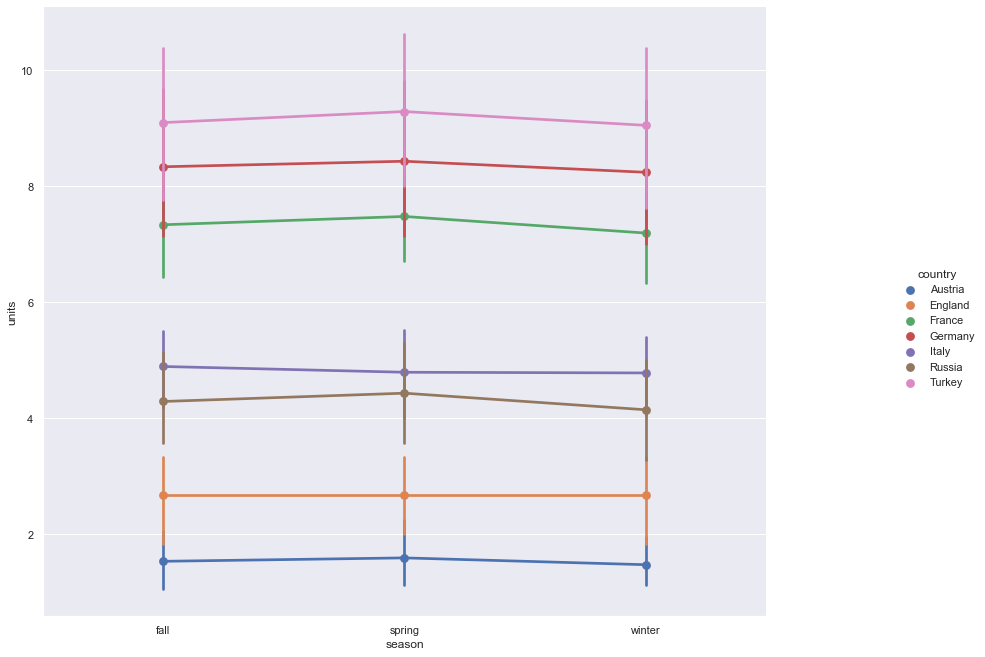

In [52]:
# plt.figure(figsize=(200, 6))
# plt.subplots(figsize=(20,15))
g=sns.catplot(x="season", y="units", hue="country", kind="point", data=country_season_df_sorted)
g.fig.set_size_inches(15,10)

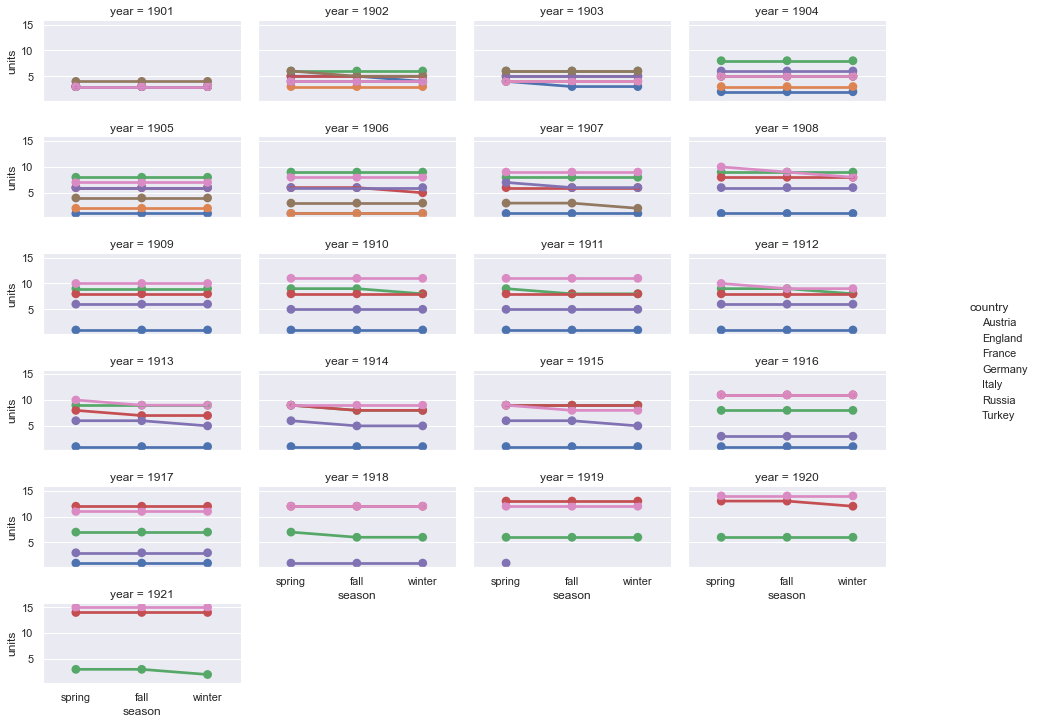

In [53]:
g = sns.FacetGrid(country_season_df_sorted, col="year", hue='country', col_wrap=4, height=2)
g.map(sns.pointplot, "season", "units", order=['spring', 'fall', 'winter'], ci=None)
# g.map(plt.scatter, "season", "units")
g.add_legend();
g.fig.set_size_inches(15,10)
# g.map(sns.barplot, x="year", y="units", hue="country", data=country_season_df_sorted);

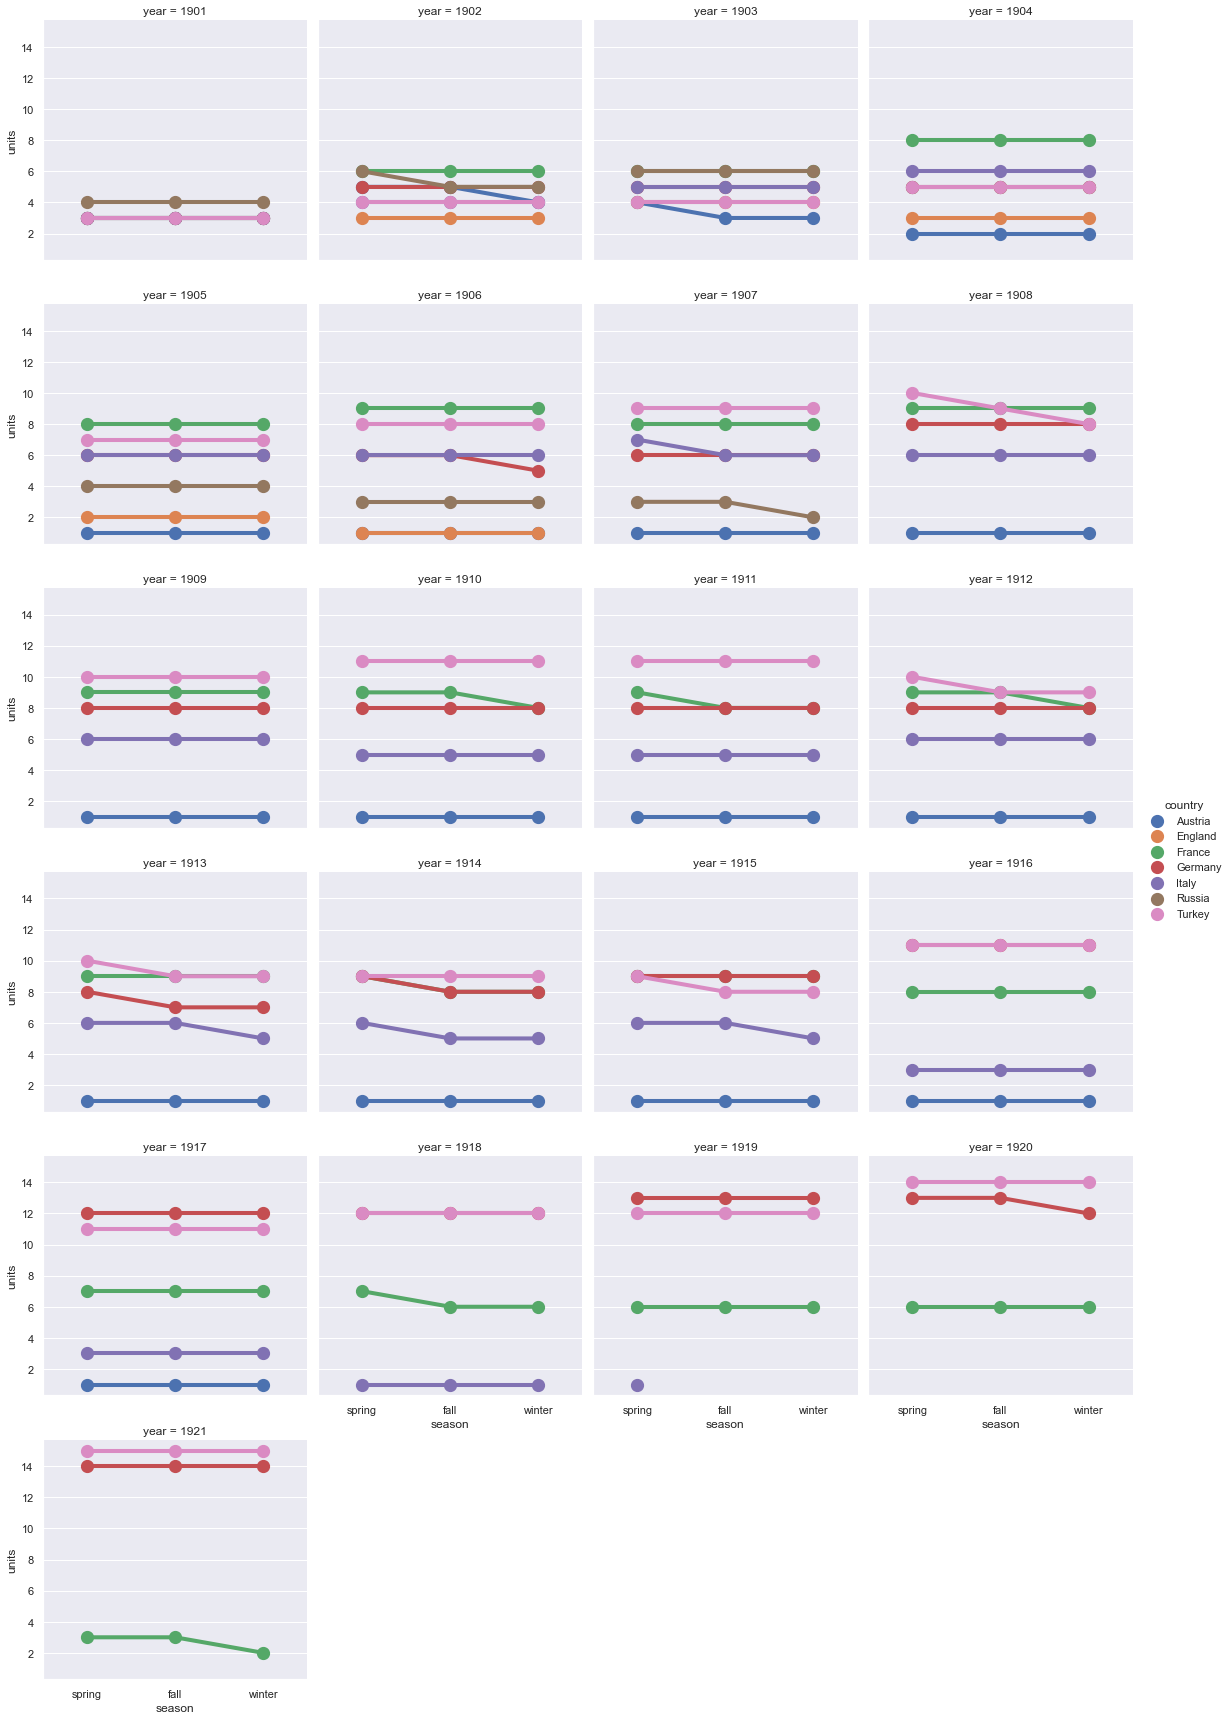

In [54]:
sns.catplot(x="season", y="units", hue="country", order=['spring', 'fall', 'winter'], col="year",
               col_wrap=4, height=4, aspect=1, scale=1.5,
               data=country_season_df_sorted, kind="point")

In [55]:
tips = sns.load_dataset("tips")

In [56]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
